In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
X=data.drop(["CustomerID"],axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
dbscan=DBSCAN(eps=8,min_samples=3)
labels=dbscan.fit_predict(data)

In [9]:
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  1,  1,  1,  2,
       -1, -1, -1,  2,  2,  2, -1, -1,  2,  3,  4,  3, -1,  3,  4, -1,  3,
        4, -1,  3, -1,  5,  5,  5, -1, -1, -1, -1,  6,  5, -1, -1,  6, -1,
        6, -1, -1, -1,  6, -1, -1,  6, -1, -1,  7,  6,  7,  6,  7, -1,  6,
       -1, -1, -1, -1,  8, -1,  8,  8,  8,  9, -1,  9,  9,  9, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10, -1, -1,
       -1, 10, -1, 10, -1, 11, -1, 11, -1, 11, -1, -1, -1, 11, 12, 11, 12,
       -1, 12, -1, -1, 13, -1, 13, -1, 13, -1, 14, -1, -1, -1, 14, -1, -1,
       -1, -1, -1, 14, 15, -1, 15, -1, 15, 16, -1, 16, -1, 16, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [10]:
data['Cluster'] = labels

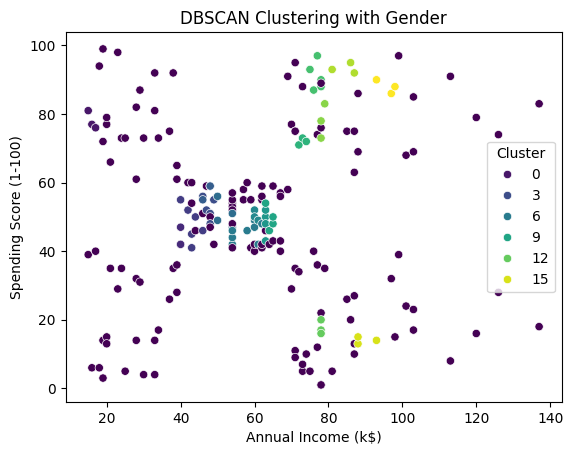

In [11]:
# Visualize the results using seaborn
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering with Gender')
plt.show()